In [1]:
from FUCCIDataset import FUCCIDataset, ReferenceChannelDataset, FUCCIChannelDataset
import numpy as np
import torch
from kornia.utils import tensor_to_image
from FUCCIDataset import FUCCIDatasetInMemory, ReferenceChannelDatasetInMemory, FUCCIChannelDatasetInMemory
from LightningModules import FUCCIDataModule
from microfilm import microplot

In [2]:
# FUCCI_PATH = '/home/ishang/cross-modal-autoencoders/FUCCI-dev-data'
# FUCCI_PATH = '/home/ishang/implicit-cell-model/FUCCI-dev-data'
FUCCI_PATH = '/data/ishang/Fucci-dataset-v3_filtered/'
# ds_og = ReferenceChannelDataset(FUCCI_PATH, imsize=256)
# ds = ReferenceChannelDataset(FUCCI_PATH, imsize=256)
ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
# ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
# print(ds.dataset_images.shape)
ds[0].shape
ds[20].shape
print(type(ds[0]))
# print(type(ds_og[0]))
# print(len(ds_og))

<class 'torch.Tensor'>


In [3]:
# ct = 0
# for i in range(len(ds_og)):
#     # print(ds[i].shape, ds_og[i].shape)
#     if not torch.allclose(ds[i], ds_og[i]):
#         print(i)
#         ct += 1
# print(ct)

torch.float32
[tensor(-0.4855), tensor(0.8358), tensor(0.1202), tensor(1.), tensor(1.), tensor(0.5279), tensor(0.3302), tensor(-0.0654), tensor(0.6716), tensor(-0.6771), tensor(0.9539), tensor(0.9079), tensor(0.3460), tensor(0.0630), tensor(0.0193), tensor(-0.3208), tensor(0.1902), tensor(-0.4901), tensor(1.), tensor(0.1706), tensor(0.8545), tensor(0.5225), tensor(0.1537), tensor(0.7904), tensor(0.0122), tensor(0.9723), tensor(-0.5092), tensor(0.3123), tensor(0.6073), tensor(1.), tensor(0.5411), tensor(0.4028), tensor(0.9452), tensor(0.5864), tensor(0.4559), tensor(1.), tensor(0.1609), tensor(0.5331), tensor(0.8980), tensor(0.9236), tensor(0.4611), tensor(0.8026), tensor(0.9838), tensor(0.8951), tensor(0.5050), tensor(0.8288), tensor(0.7513), tensor(0.9572), tensor(0.5789), tensor(0.6361), tensor(1.), tensor(0.7646), tensor(0.1772), tensor(0.5266), tensor(0.9677), tensor(0.8927), tensor(0.5046), tensor(0.4919), tensor(1.), tensor(0.5993), tensor(0.8816), tensor(0.9528), tensor(0.9114),

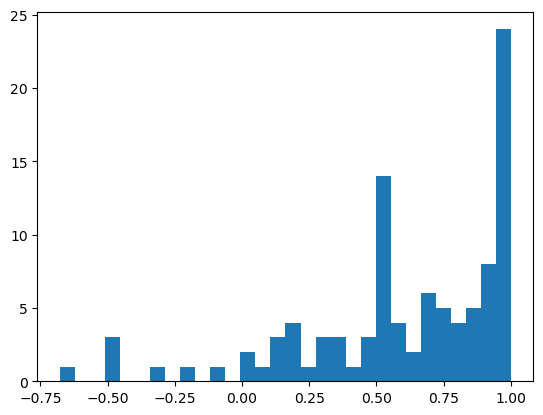

[tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.)

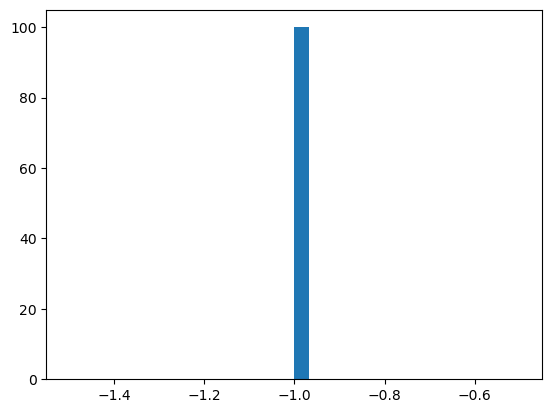

In [4]:
# print(len(ds))
print(ds[0].dtype)
# get max value of each image and max value of the whole dataset
max_vals = []
for i in range(min(len(ds), 100)):
    max_vals.append(torch.max(ds[i]))
print(max_vals)
print(max(max_vals))
# plot histogram of max values
import matplotlib.pyplot as plt
plt.hist(max_vals, bins=30)
plt.show()

# do the same for min values
min_vals = []
for i in range(min(len(ds), 100)):
    min_vals.append(torch.min(ds[i]))
print(min_vals)
plt.clf()
plt.hist(min_vals, bins=30)
plt.show()

In [9]:
# dm = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=1024)
# dm_small = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=256)
dm = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=256)
# dm_super_small = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=64)
train_data = dm.train_dataloader()
data_batch = next(iter(train_data))
# data_batch_small = next(iter(dm_small.train_dataloader()))

(2, 256, 256)


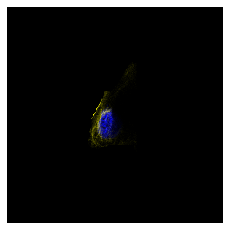

In [10]:
torch.max(data_batch[0, 1, :, :])
cmap = ['pure_blue', 'pure_yellow', 'pure_green', 'pure_red']
img = np.moveaxis(tensor_to_image(data_batch[0]), -1, 0)
print(img.shape)
microplot.microshow(images=img, cmaps=cmap[:2])

(2, 256, 256)
-1.0 0.6456553


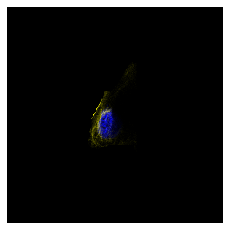

In [11]:
# img_small = np.moveaxis(tensor_to_image(data_batch_small[0]), -1, 0)
# img_1024 = microplot.microshow(images=img, cmaps=cmap[:2])
# img_256 = microplot.microshow(images=img_small, cmaps=cmap[:2]) 
img_256 = microplot.microshow(images=img, cmaps=cmap[:2]) 
# img_1024.savefig("sample_ref_1024.png")
img_256.savefig("sample_ref_256.png")
print(img.shape)
# print(img_small.shape)
print(img.min(), img.max())

In [12]:
# import imageio as iio

# iio.imwrite("sample_ref_nuclei_256.png", img_small[0])
# iio.imwrite("sample_ref_microtubule_256.png", img_small[1])
# iio.imwrite("sample_ref_nuclei_1024.png", img[0])
# iio.imwrite("sample_ref_microtubule_1024.png", img[1])

# convert images from -1 to 1 to 0 to 255
# data_batch_super_small = next(iter(dm_super_small.train_dataloader()))
# img_super_small = np.moveaxis(tensor_to_image(data_batch_super_small[0]), -1, 0)
# img_super_small = (255 * (img_super_small / 2 + 0.5)).astype(np.uint8)
# img_small = (255 * (img_small / 2 + 0.5)).astype(np.uint8)
img = (255 * (img / 2 + 0.5)).astype(np.uint8)
from PIL import Image
# Image.fromarray(img_small[0]).convert("L").save("sample_ref_nuclei_256.png")
Image.fromarray(img[0]).convert("L").save("sample_ref_nuclei_256.png")
# Image.fromarray(img_small[1]).convert("L").save("sample_ref_microtubule_256.png")
Image.fromarray(img[1]).convert("L").save("sample_ref_microtubule_256.png")
# Image.fromarray(img[0]).convert("L").save("sample_ref_nuclei_1024.png")
# Image.fromarray(img[1]).convert("L").save("sample_ref_microtubule_1024.png")
# Image.fromarray(img_super_small[0]).convert("L").save("sample_ref_nuclei_64.png")
# Image.fromarray(img_super_small[1]).convert("L").save("sample_ref_microtubule_64.png")

In [14]:
for i in range(5):
    img = np.moveaxis(tensor_to_image(data_batch[i]), -1, 0)
    img = (255 * (img / 2 + 0.5)).astype(np.uint8)
    Image.fromarray(img[0]).convert("L").save(f"sample_ref_nuclei_256_{i}.png")

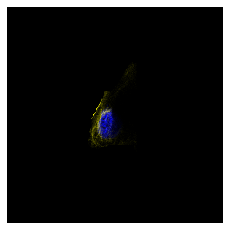

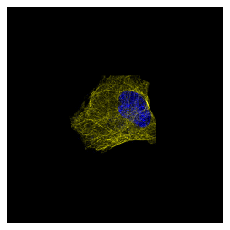

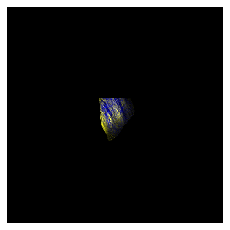

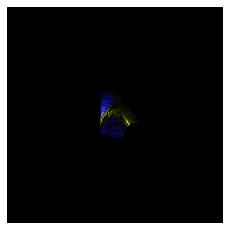

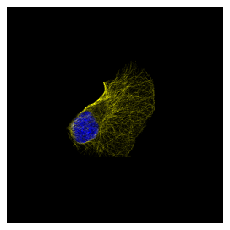

In [15]:
for i in range(5):
    img = np.moveaxis(tensor_to_image(data_batch[i]), -1, 0)
    microplot.microshow(images=img[0]).savefig(f"sample_ref_256_nuclei{i}.png")
    